## 🔗 Open This Notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DavidLangworthy/ds4s/blob/master/Day%205_%20Capstone%20–%20CO₂%20Emissions%20%26%20Global%20Temperature.ipynb)

# 🔥 Day 5 – Capstone Project: CO₂ and Climate  
### Telling the Big Story with Data

You’ve made it to the final day! Today is your chance to bring everything together — loading real data, analyzing trends, building a polished visualization, and telling a story that matters.

Your task: **show how human-caused CO₂ emissions relate to global temperature rise**.  
It’s a chance to take what you’ve learned and apply it to a real-world issue, from start to finish.

---

## 🧭 What You’ll Do

This is a **capstone project** — more open-ended than the earlier days. You’ll:
- Load and combine multiple datasets
- Design a compelling visualization (or two)
- Write a clear narrative explaining what you found
- Build a mini-report you could share with others

You’ll work more independently, but still have prompts, examples, and a solution notebook to reference.

---

## 🔧 Tools & Setup

You can use:
- `pandas` for data handling
- `matplotlib` or `plotly` for plotting (your choice!)
- Google Colab as always — nothing new to install beyond what you’ve used

---

## 📊 Datasets

You’ll work with:
- **Global CO₂ Emissions** (1900–2022): Emissions in gigatonnes per year from fossil fuels. Source: Our World in Data / Global Carbon Project.
- **Global Temperature Anomalies** (1880–2024): Annual average temperature change (°C) from NASA GISTEMP.

> We’ve pre-cleaned these so they’re easy to load and join on the `Year` column.

Optional: If you finish early, you can add a third dataset (like methane, sea level, or atmospheric CO₂ concentration).

---

## 🛠️ Lab: CO₂ and Climate – Capstone Story

Open the notebook titled **“CO₂ and Climate: Capstone Story.”** Here’s the flow:

---

### 1. Question & Planning

You’ll start with this guiding question:

> **How do global CO₂ emissions relate to global temperature change?**

You decide how to visualize it:
- A **dual-axis line plot**?
- Two charts side-by-side?
- Something else?

The notebook gives you some suggestions and example code blocks to build from.

---

### 2. Loading the Data

You’ll read in the two CSVs:
```python
df_co2 = pd.read_csv('global_co2.csv')
df_temp = pd.read_csv('global_temp.csv')
```

Check the columns, inspect the structure, and filter the years to get a shared range (e.g. 1880–2020).

---

### 3. Merging the Data

Join the datasets on the `Year` column:
```python
df = pd.merge(df_co2, df_temp, on='Year')
```

You should now have a DataFrame with:
- `Year`
- `CO2` (e.g. in gigatonnes)
- `Temperature` (°C anomaly)

---

### 4. Visualization – Dual Line Chart

You’ll create a plot with:
- CO₂ emissions on one y-axis
- Temperature on another y-axis
- Both plotted over time

Example using `matplotlib`:

```python
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['Year'], df['CO2'], color='brown', label='CO₂ Emissions')
ax2.plot(df['Year'], df['Temperature'], color='red', label='Temperature Anomaly')

ax1.set_ylabel('CO₂ Emissions (Gt/year)')
ax2.set_ylabel('Temperature Anomaly (°C)')
ax1.set_xlabel('Year')
ax1.set_title('Global CO₂ Emissions and Temperature (1900–2020)')
```

> 💡 You’ll add labels, a legend, maybe an annotation at 2020, and polish your chart. The goal is to clearly show how these two lines **rise together** — a powerful visual of cause and effect.

---

### 5. Optional Add-On

If you want more:
- Try a **scatter plot** of CO₂ vs. Temperature (each point = a year)
- Animate the scatter over time
- Try using Plotly for interactivity

But the dual-line chart is more than enough!

---

### 6. Telling the Story

You’ll write up your project like a short data report.

The notebook includes Markdown cells for:
- **Introduction** – What’s the question? Why does it matter?
- **Plot + Analysis** – What does your visualization show?
- **Conclusion** – What did you learn? What’s the message?

> Example:  
> “The data shows a clear link: as CO₂ emissions grew from 5 to 35 gigatonnes per year between 1950 and 2020, global temperatures rose ~1°C. The correlation is striking — and lines up with what climate science tells us.”

Be sure to cite your sources:
- CO₂ data: Our World in Data / Global Carbon Project  
- Temperature: NASA GISTEMP

---

## 🧪 Support & Solutions

- The **starter notebook** includes code stubs, suggestions, and space for your writing
- The **solution notebook** provides a full example with a polished chart and narrative

TAs and instructors are available for help if you get stuck — but this is your chance to build something on your own!

---

## ✅ What You’ll Walk Away With

By completing this project, you’ll demonstrate:
- Independent data analysis and cleaning
- Merging and visualizing multiple datasets
- Writing an engaging and informative narrative
- The ability to **communicate sustainability insights with code and clarity**

This is your final notebook — your **portfolio piece**. It tells a story that the world needs to hear.

Let’s go tell it.
```

---

Let me know if you’d like the final course summary, export-friendly versions, or the full Markdown collection bundled together!

In [1]:
# Install libraries if needed
import pandas as pd

# URL from Our World in Data's official data repository
url_co2 = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'

# Load and filter global CO₂ emissions (world total)
df_co2_full = pd.read_csv(url_co2)
df_co2 = df_co2_full[df_co2_full['country'] == 'World'][['year', 'co2']]
df_co2.rename(columns={'year':'Year', 'co2':'CO2'}, inplace=True)
df_co2.dropna(inplace=True)

# Save to CSV
df_co2.to_csv('global_co2.csv', index=False)


In [ ]:
import pandas as pd

# Load data from your uploaded file
df_temp = pd.read_csv('https://raw.githubusercontent.com/DavidLangworthy/ds4s/master/data/GLB.Ts+dSST.csv', skiprows=1, na_values=['***'])

# Select just the 'Year' and annual mean column 'J-D'
df_temp = df_temp[['Year', 'J-D']].rename(columns={'J-D': 'TempAnomaly'})

# Remove rows with NaN values
df_temp.dropna(inplace=True)

# Convert TempAnomaly to numeric
df_temp['TempAnomaly'] = pd.to_numeric(df_temp['TempAnomaly'])

# Save cleaned data
df_temp.to_csv('global_temp.csv', index=False)



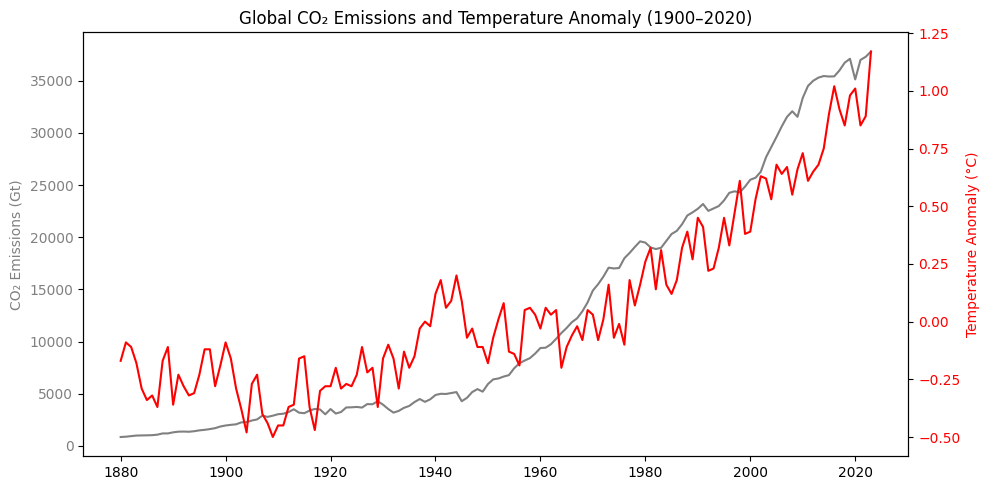

In [9]:
# Notebook: Day 5 – Capstone: CO2 Emissions & Temperature
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_co2 = pd.read_csv('global_co2.csv').set_index('Year')
df_temp = pd.read_csv('global_temp.csv').set_index('Year')

# Merge data
df_merged = df_co2.join(df_temp, how='inner')

# Dual-axis line plot
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(df_merged.index, df_merged['CO2'], color='gray', label='CO₂ Emissions (Gt)')
ax1.set_ylabel('CO₂ Emissions (Gt)', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

ax2 = ax1.twinx()
ax2.plot(df_merged.index, df_merged['TempAnomaly'], color='red', label='Temperature Anomaly (°C)')
ax2.set_ylabel('Temperature Anomaly (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Global CO₂ Emissions and Temperature Anomaly (1900–2020)')
fig.tight_layout()
plt.show()

# --- Starter Notebook elide: remove axis setup and second y-axis entirely ---
